In [1]:
import os
import pandas as pd
import geopandas as gpd

local_crs = 32636
example_data_path = "./data"

In [2]:
from masterplan_tools.models import City 

aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

city_model = City(accessibility_matrix, aggregated_blocks)

In [3]:
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet")).to_crs(local_crs)
city_model.update_service_type_layer(service_type=city_model['kindergartens'], gdf=kindergartens)
service_type = 'kindergartens'

In [4]:
from masterplan_tools.method.provision import Provision
prov = Provision(city_model=city_model)

In [7]:
gdf = prov.calculate_provision(service_type=city_model['kindergartens'])

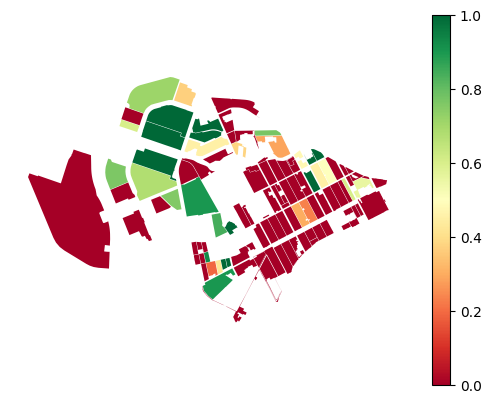

In [8]:
Provision.plot(gdf)